# Preparations

In [1]:
from utils import show_image_from_response, show_image_from_path, play_music_from_response, show_image_from_numpy

In [79]:
import time
from pathlib import Path
from typing import Union

import requests
from skimage.io import imread

from config.config import ApiConfig


def image_request(model_name: str, img_path: Union[str, Path], verbose=True, input_params={}):
    config = ApiConfig()

    print("Make predict request to inference API...")
    start_time = time.time()
    response = requests.post(
        url=f"{config.API_URL}/image/{model_name}/predict",
        files={"input_payload": open(img_path, 'rb'), 'input_parameters': json.dumps(input_params)},
        headers=config.headers
    )
    if verbose: print(f"Response received: {response.json()}")
    print(f"Request Time: {time.time() - start_time}")
    response.raise_for_status()
    return response.json()

def text_request(model_name: str, model_domain: str, text: str, verbose=True, input_params={}):
    config = ApiConfig()

    print("Make predict request to inference API...")
    response = requests.post(
        url=f"{config.API_URL}/{model_domain}/{model_name}/predict",
        files={"input_payload": json.dumps(text), 'input_parameters': json.dumps(input_params)},
        headers=config.headers
    )
    if verbose: print(f"Response received: {response}")
    response.raise_for_status()
    return response.json()

# Image Classification with Simple TensorFlow Model
This is a simple image classifier trained on Cifar-10.

The following shows the picture that will be posted to https://www.inferencehub.io/.

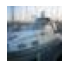

In [3]:
show_image_from_path("input_samples/image-tensorflow-simple-img-classifier.jpg", size=(1, 1))

We can post this picture to our API now, where the TensorFlow Classifier is uploaded:

In [22]:
resp = image_request('tensorflow-simple-img-classifier', "input_samples/image-tensorflow-simple-img-classifier.jpg")

Reading input sample to memory...
Make predict request to inference API...
Response received: "ship"
Request Time: 0.2507340908050537


# Unet
This model is used for image segmentation and is trained on cars.

The following shows the input sample and the corresponding prediction output:

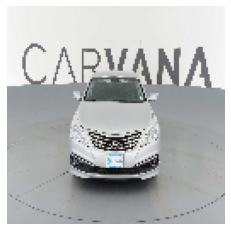

Reading input sample to memory...
Make predict request to inference API...
Request Time: 25.177983283996582


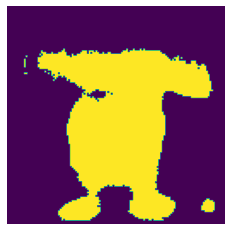

In [25]:
show_image_from_path("input_samples/image-unet.png")
resp = image_request('PyTorch-2D-3D-UNet-Tutorial', "input_samples/image-unet.png", verbose=False)
show_image_from_response(resp)

# Yolo5
This is a standard version of the YOLOv5 model from https://github.com/ultralytics/yolov5.

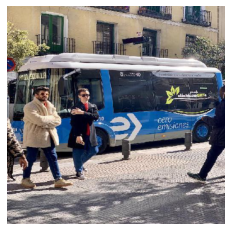

Make predict request to inference API...
Request Time: 1.245105266571045


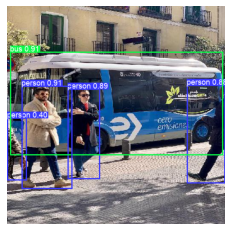

In [81]:
show_image_from_path("input_samples/image-yolo5.jpg")

image_request('YOLOv5l', "input_samples/image-yolo5.jpg", verbose=False)
show_image_from_response(resp)

# Music using GPT-2
This model uses the language model GPT-2 to generate music. The original model is from https://huggingface.co/TristanBehrens/js-fakes-4bars.

In [ ]:
resp = text_request('js-fakes-4bars', 'audio', "PIECE_START STYLE=JSFAKES GENRE=JSFAKES TRACK_START INST=48 BAR_START NOTE_ON=60")
print(resp)
play_music_from_response(resp)

Make predict request to inference API...
Response received: <Response [200]>
"PIECE_START STYLE=JSFAKES GENRE=JSFAKES TRACK_START INST=48 BAR_START NOTE_ON=60 TIME_DELTA=4 NOTE_OFF=60 NOTE_ON=60 TIME_DELTA=4 NOTE_OFF=60 NOTE_ON=60 TIME_DELTA=4 NOTE_OFF=60 NOTE_ON=60 TIME_DELTA=4 NOTE_OFF=60 BAR_END BAR_START"


Loading BokehJS ...